In [15]:
from basis_method.basis_process_dim32_class2 import *
import torch 

basis_matrix = torch.tensor(basis_process_dim32_class2(h=0.5))
torch.linalg.eigvals(torch.inverse(basis_matrix)).real.max(dim=2)[0].size()

torch.Size([2, 4])

In [11]:
torch.linalg.eigvals(torch.inverse(basis_matrix)).real.size()

torch.Size([2, 4, 32])

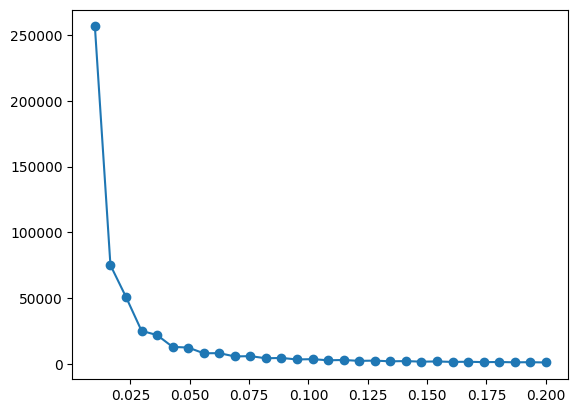

In [48]:
from basis_method.basis_process_dim32_class2 import *
import torch 

h = np.linspace(0.01, 0.2, 30)
res_dic = {
    'h': [],
    'seed': [],
    'max': [],
    'max_inv': []
}

for test_h in h:
    for _ in range(10):
        seed = np.random.randint(100)
        basis_matrix = basis_process_dim32_class2(h=test_h, seed=seed)
        basis_matrix = torch.tensor(basis_matrix)
        inv = torch.inverse(basis_matrix)
        res_dic['h'].append(test_h)
        res_dic['seed'].append(seed)
        res_dic['max'].append(basis_matrix.max().item())
        res_dic['max_inv'].append(inv.max().item())
        
import pandas as pd 
import matplotlib.pyplot as plt 

max_inv = []
df = pd.DataFrame(res_dic)

for t_h in h:
    max_inv.append(df['max_inv'][df['h']==t_h].mean())

plt.plot(h, max_inv, '-o')

In [55]:
df['seed'][df['h']==0.2]

290     9
291    86
292    18
293    92
294     9
295    86
296    18
297    92
298     9
299    86
Name: seed, dtype: int64

In [51]:
basis_matrix = basis_process_dim32_class2(h=10, seed=seed)
basis_matrix = torch.tensor(basis_matrix)
inv_basis_matrix = torch.inverse(basis_matrix)

torch.einsum('ijkl, ijlp->ijkp', basis_matrix, inv_basis_matrix)

tensor([[[[ 1.0000e+00, -3.2001e-16, -4.0749e-16,  ..., -2.2204e-16,
           -8.8818e-16, -8.8818e-16],
          [-5.3631e-17,  1.0000e+00,  1.2806e-16,  ...,  1.1102e-15,
           -1.7764e-15, -1.7764e-15],
          [-1.6145e-16, -1.1555e-15,  1.0000e+00,  ..., -4.4409e-16,
           -4.4409e-16, -4.4409e-16],
          ...,
          [ 4.0480e-15, -1.2960e-15, -8.1772e-16,  ...,  1.0000e+00,
            0.0000e+00, -4.4409e-16],
          [ 1.4765e-15, -3.1710e-15,  4.4359e-16,  ...,  1.5543e-15,
            1.0000e+00, -1.7764e-15],
          [ 1.1027e-15,  4.2369e-16,  6.1293e-16,  ..., -3.1086e-15,
           -1.7764e-15,  1.0000e+00]],

         [[ 1.0000e+00, -1.1653e-15, -7.1656e-17,  ...,  4.4409e-16,
            3.5527e-15,  0.0000e+00],
          [-1.1410e-15,  1.0000e+00,  1.9584e-15,  ..., -8.8818e-16,
            0.0000e+00, -1.7764e-15],
          [ 4.8726e-16, -5.8621e-16,  1.0000e+00,  ...,  8.8818e-16,
            8.8818e-16, -4.4409e-16],
          ...,
     

In [49]:
basis_matrix.size()

torch.Size([2, 4, 32, 32])

In [2]:
print(A)
a = a + 1
print(A)

tensor([1, 1])
tensor([1, 1])


In [51]:
import numpy as np 
index_sequence.reverse()

In [52]:
index_sequence

[1, 1]

In [29]:
import torch 
# 假设 tensor_a 和 tensor_b 是您的两个 4x8x8 张量
tensor_a = torch.rand(4, 8, 8)
tensor_b = torch.rand(4, 8, 8)

# 使用 torch.einsum 进行运算
result_einsum = torch.einsum('bij,bjk->bik', tensor_a, tensor_b)

# 使用循环和 torch.matmul 进行逐个矩阵乘法
result_loop = torch.stack([torch.matmul(tensor_a[i], tensor_b[i]) for i in range(tensor_a.size(0))])

# 验证结果是否一致
print(torch.allclose(result_einsum, result_loop))


True


In [36]:
import torch 
for g in torch.cartesian_prod(torch.arange(2), torch.arange(2)).numpy():
    print(g[0], g[1])

0 0
0 1
1 0
1 1


In [5]:
# scatter_mean 使用实例。特征从 edge_index[0] 传出，汇聚到 edge_index[1] 上

import torch
from torch_scatter import scatter_mean

# 假设 x 是一个节点特征矩阵，大小为 [num_nodes, num_features]
x = torch.tensor([[1, 3], [2, 4], [3, 5], [4, 8]], dtype=torch.float)

# edge_index 定义了图的边，每一列代表一条边，行表示边的起点和终点
edge_index = torch.tensor([[0, 1, 2, 0, 3], [1, 2, 0, 3, 2]], dtype=torch.long)

# 使用 edge_index 的第一行来聚合特征，因为它代表目标节点的索引
target = edge_index[1]

# 执行 scatter_mean 来聚合特征
# x[edge_index[0]] 将源节点的特征提取出来
# target 定义了应该聚合到哪个节点上
# dim_size 是目标节点的数量
node_feature_aggregated = scatter_mean(x[edge_index[0]], target, dim=0, dim_size=x.size(0))

print(node_feature_aggregated)


tensor([[3., 5.],
        [1., 3.],
        [3., 6.],
        [1., 3.]])


In [3]:
import torch 

# 下标索引生成的张量与之前的张量元素相互独立
A = torch.tensor([1,2,3])
B = A[[0,0,1,1,2,2]]
print(B)
A[0] = 9
B

tensor([1, 1, 2, 2, 3, 3])


tensor([1, 1, 2, 2, 3, 3])

In [18]:
# 读取 utiles_data 中的数据
import torch
from torch_geometric.data import Data
from utils import load_dataset
from model import GCN, ourModel, MLP
from tqdm import tqdm
from torch.optim import Adam, SGD, AdamW
import torch.nn.functional as F
from selecting_algorithm import Flexmatch, UPS
import os 
import pandas as pd 
import argparse
from copy import deepcopy
import numpy as np
import torch.nn as nn
import yaml
from copy import deepcopy
import pickle
import random

def test(graph):
    for i in range(10):
        if not torch.sum(graph.edge_index[0]==i) == torch.sum(graph.edge_index[0]==i):
            return False
    return True


name_list = ["yelp-chi", "deezer-europe", "pokec", "arxiv-year", "snap-patents", "chameleon", "cornell", "squirrel", "texas", "wisconsin"]
for name in name_list:
    dataset = load_dataset(name)
    print(name)
    split_dataset_balanced(dataset, 0.4, 0.2, 0.2, 0.2)
    graph = preprocessing(dataset)
    if test(graph):
        print("Undirected!")
    else:
        print('Directed!')


yelp-chi
Undirected!
deezer-europe
Undirected!
pokec
Undirected!
arxiv-year
Undirected!
snap-patents
Undirected!
chameleon
Undirected!
cornell
Undirected!
squirrel
Undirected!
texas
Undirected!
wisconsin
Undirected!


In [30]:
torch.sum(G.edge_pseudolabel[G.test_index]>=0)

tensor(809, device='cuda:4')

In [31]:
torch.sum(G.test_index)

tensor(1901, device='cuda:4')

In [21]:
torch.sum(G.edge_pseudolabel[indices]==1)

tensor(2534, device='cuda:4')

In [8]:
torch.sum(G.edge_pseudolabel[indices]==0)

tensor(695, device='cuda:4')

In [17]:
torch.mean((G.y[indices] == G.edge_pseudolabel[indices])*1.)

tensor(0.6993, device='cuda:4')

In [11]:
A = torch.tensor([1,2,3,4,5])
k=A[:2]

In [13]:
k[1] = 9

In [14]:
A


tensor([1, 9, 3, 4, 5])

In [3]:
import torch 
A = torch.tensor([[True, False],[False,True],[True,True]]).T
torch.logical_and(A[0,:], A[1,:])

tensor([False, False,  True])

In [17]:
A = torch.tensor([[0,1],[0,2]]).T
labels = torch.tensor([1,2,3])
torch.cat((labels[A[0,:]].unsqueeze(0), labels[A[1,:]].unsqueeze(0)), dim=0)

tensor([[1, 1],
        [2, 3]])

In [18]:
A

tensor([[0, 0],
        [1, 2]])

In [11]:
A

tensor([[0, 0],
        [1, 2]])

In [9]:
torch.max(A, dim=1)[1]

tensor([1, 0, 0])

In [3]:
np.array(A) @ np.array(B)

array([[ 6,  6],
       [14, 14]])

In [ ]:
from Non_Homophily_Large_Scale.dataset import *

# datanames = ['twitch-e', 'fb100', 'ogbn-proteins', 'deezer-europe', 'arxiv-year', 'pokec', 'snap-patents',
#              'yelp-chi', 'ogbn-arxiv', 'ogbn-products', 'Cora', 'CiteSeer', 'PubMed', 'chameleon', 'cornell',
#              'film', 'squirrel', 'texas', 'wisconsin', 'genius', 'twitch-gamer', 'wiki']
datanames = ['yelp-chi']

for data in datanames:
    dataset = load_nc_dataset(data)



In [1]:
import numpy as np 
np.save('ss.npy', np.array([12,3]))

In [ ]:
import torch
import random

# def random_select(tensor, K):
tensor = torch.zeros(10)
K = 5
indices = random.sample(range(10), K)  # 从 0 到 N-1 之间的索引中随机选择 K 个不重复的位置
tensor.view(-1)[indices] = True  # 将选中位置的值设为 1
tensor

In [ ]:
(tensor == 0)

In [1]:
import torch
from torch_geometric.data import Data
from utils import load_dataset, split_dataset
from model import GCN
datanames = ['twitch-e', 'fb100', 'ogbn-proteins', 'deezer-europe', 'arxiv-year', 'pokec', 'snap-patents',
             'yelp-chi', 'ogbn-arxiv', 'ogbn-products', 'Cora', 'CiteSeer', 'PubMed', 'chameleon', 'cornell',
             'film', 'squirrel', 'texas', 'wisconsin', 'genius', 'twitch-gamer', 'wiki']
# datanames = ['fb100']

# for data in datanames:
#     dataset = load_dataset(data)
#     print(data, len(dataset))
data = 'yelp-chi'
dataset = load_dataset(data)
split_dataset(dataset, 0.2, 0.8)

graph = dataset[0][0]
label = dataset.label
num_class = len(torch.unique(label))

In [7]:
for key in graph.keys():
    print(key=='node_feat')

False
True
False
False
False
False
False


In [15]:
A = torch.randn((6,2))
A = A / A.max()
A

tensor([[-0.7417, -0.4761],
        [ 0.1925, -0.0169],
        [ 0.2426,  0.0991],
        [ 0.1326,  0.4701],
        [ 1.0000, -0.5986],
        [ 0.3264,  0.3041]])

In [20]:
values, index = A.max(dim=1)
index

tensor([1, 0, 0, 1, 0, 0])

In [21]:
values > 0

tensor([False,  True,  True,  True,  True,  True])

In [29]:
G = Data(x=graph['node_feat'])
'pes' in G

False

In [35]:

torch.max(torch.tensor(10), torch.tensor(20))

tensor(20)

In [44]:
from tqdm import tqdm
progress_bar = tqdm(total=100, unit='iteration')
import time 
k = 0
while k<100:
    progress_bar.n = k
    progress_bar.refresh()
    k = k+torch.randint(0,5,(1,)).item()
    time.sleep(1)


 22%|██▏       | 22/100 [00:07<00:24,  3.14iteration/s]

KeyboardInterrupt: 

In [47]:
import torch
import torch.nn.functional as F

# 模型预测值
predictions = torch.tensor([[0.1, 0.2, 0.7], [0.8, 0.1, 0.1]])

# 真实标签
targets = torch.tensor([2, 0])

# 计算负对数似然损失
loss = F.nll_loss(predictions, targets)

print(loss)

tensor(-0.7500)


In [8]:
import torch

# 假设有一个N*2的概率张量
probabilities = torch.tensor([[0, 1], [0.6, 0.4], [0.3, 0.7]])

# 对概率张量进行采样
samples = torch.multinomial(probabilities, 1, replacement=True)

# 打印采样结果
print(samples)

tensor([[1],
        [1],
        [0]])


In [10]:
import torch
import torch.nn as nn

N, m, k = 3, 4, 2  # 假设的维度

# 假设有一个N*m维的张量X
X = torch.randn(N, m)

# 假设有一个N维的张量P
P = torch.tensor([0, 1, 0])

# 假设有一组MLP
mlps = nn.ModuleList([nn.Linear(m, k) for _ in range(N)])

# 将每一行的X通过对应的MLP进行前向传播
X_prime = torch.stack([mlps[i](X[i]) for i in P])

print(X_prime)

tensor([[ 0.5590,  0.0183],
        [ 0.2898, -0.6151],
        [ 0.5590,  0.0183]], grad_fn=<StackBackward0>)


In [3]:
import torch 
A = torch.randn((3,2))
A[1] = torch.tensor([1,2])

In [9]:
import torch

# 假设你的张量名为 tensor
tensor = torch.tensor([[1, 2, 3],
                       [4, 5, 6],
                       [1, 2, 3],
                       [7, 8, 9],
                       [4, 5, 6]])

# 使用 torch.unique 函数找到唯一的张量和索引
unique_tensor, inverse_indices = torch.unique(tensor, dim=0, return_inverse=True)

In [17]:
import pandas as pd 
df = pd.DataFrame()
dic = df.to_dict()
dic['fb100'] = {}
dic['fb100']['GCN'] = 1
df = pd.DataFrame(dic)

In [15]:
import torch
import torch.nn as nn
from torchviz import make_dot
from model import GCN
from utils import load_dataset,preprocessing

data = load_dataset('fb100')
graph = preprocessing(data)
# 创建模型实例
input_size = 1
output_size = 1
model = GCN(4814,32,2, num_layers=3, dropout=0.3)
model.eval()

# 前向传播获取输出
outputs = model(graph)

# 可视化计算图
make_dot(outputs, params=dict(model.named_parameters())).render("computational_graph")

Invalid sub_dataname, deferring to Penn94 graph


'computational_graph.pdf'

In [2]:
from collections import Counter

Counter('baabbcccs').values()

dict_values([3, 2, 3, 1])

In [13]:
import torch

# 示例tensor和batch大小
my_tensor = torch.tensor([False, True, False, True, True])
batch_size = 2

# 找到所有为True的索引
true_indices = torch.where(my_tensor)[0]

# 如果True的数量少于batch大小，取所有True；否则随机抽样
if len(true_indices) <= batch_size:
    selected_indices = true_indices
else:
    shuffled_indices = torch.randperm(len(true_indices))[:batch_size]
    selected_indices = true_indices[shuffled_indices]

# 输出结果
print("Selected indices:", selected_indices)


Selected indices: tensor([4, 1])


In [22]:
my_tensor = torch.tensor([False, True, False, True, True])

In [26]:
A = my_tensor.clone()
A[selected_indices] = False

In [9]:
import torch
from torch_geometric.data import Data

# 创建节点特征矩阵
x = torch.tensor([[1, 2], [3, 4], [5, 6]], dtype=torch.float)

# 创建边索引矩阵
edge_index = torch.tensor([[0, 1, 1, 2,3], [1, 0, 2, 1,4]], dtype=torch.long)

# 创建边特征矩阵（可选）
edge_attr = torch.tensor([[0.5], [1.0], [2.0], [1.5]], dtype=torch.float)

# 创建类别标签（可选）
y = torch.tensor([0, 1, 1], dtype=torch.long)

# 创建权重（可选）
weight = torch.tensor([0.1, 0.2, 0.3, 0.4], dtype=torch.float)

# 创建一个 Data 对象
data = Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y, weight=weight)

In [10]:
import torch
from torch_geometric.data import Data

def find_edges_connected_to_nodes(data, node_indices):

    node_indices = torch.tensor(node_indices)
    mask = (data.edge_index[0].unsqueeze(1) == node_indices) | (data.edge_index[1].unsqueeze(1) == node_indices)
    mask = mask.any(dim=1)
    edge_indices = mask.nonzero(as_tuple=False).view(-1)
    return edge_indices

# 示例
# 假设你的图数据对象是 `data`
# 假设要找的节点索引列表是 `node_indices`
node_indices = [0, 2]  # 你可以根据需要修改这个列表
edge_indices = find_edges_connected_to_nodes(data, node_indices)


In [3]:
import torch

edge_indices = torch.tensor([0,1,2,3])

In [1]:
import torch 
A = torch.randn((3,2))
B = torch.randn((3,2))


In [6]:
l = 0
torch.sum((A-B) * (A-B))/3

tensor(8.1151)

In [38]:
A = torch.tensor([2,3,1,5,4])
B = torch.tensor([[1,1],
                  [2,2],
                  [3,3],
                  [4,4],
                  [5,5]], dtype=float)
sorted_indices = torch.argsort(A)

In [39]:
B_sorted = B[sorted_indices]
tmp = B_sorted[:2]
C = [torch.zeros_like(B_sorted[:2]), B_sorted[2:]*0.7]

C = torch.cat(C)

In [40]:
tmp

tensor([[3., 3.],
        [1., 1.]], dtype=torch.float64)

In [41]:
indices = torch.argsort(sorted_indices)
C = C[indices]
C

tensor([[0.0000, 0.0000],
        [1.4000, 1.4000],
        [0.0000, 0.0000],
        [2.8000, 2.8000],
        [3.5000, 3.5000]], dtype=torch.float64)

In [9]:

from train import *

seed = 42
dataset = load_dataset('twitch-e')
split_dataset(dataset, 0.8, 0.1, 0.1)
graph = preprocessing(dataset)


graph.to('cuda:4')

graph.pseudolabel = torch.zeros_like(graph.y)-2 # '-2' means labeled data
graph.pseudolabel[graph['test_index']] = -1 # '-1' means unlabeled data
if 'val_index' in graph:
    graph.pseudolabel[graph['val_index']] = -1 # validation data is treated equally as unlabeled data

graph.training_labels = graph.pseudolabel.clone()
graph.training_labels[graph['train_index']] = graph.y[graph['train_index']]
criterion = nn.CrossEntropyLoss()



Invalid sub_dataname, deferring to DE graph


In [23]:
loss_1 = []
for _ in range(1000):
    model = ourModel(input_dim=graph.num_features, 
                output_dim=graph.num_class, 
                hidden_dim=32, 
                num_layers=3,
                dropout=0.3)
    model.to('cuda:4')
    logits = model(graph)
    loss_1.append(criterion(logits[graph['test_index']], graph.y[graph['test_index']]).item())

import numpy as np 
print(f'Mean:{np.mean(loss_1)}, Std:{np.std(loss_1)}')

Mean:0.8136620280146599, Std:0.08369003941252974


In [24]:
loss_2 = []
model = ourModel(input_dim=graph.num_features, 
            output_dim=graph.num_class, 
            hidden_dim=32, 
            num_layers=3,
            dropout=0.3)
for _ in range(1000):
    model.restart()
    model.to('cuda:4')
    logits = model(graph)
    loss_1.append(criterion(logits[graph['test_index']], graph.y[graph['test_index']]).item())

print(f'Mean:{np.mean(loss_1)}, Std:{np.std(loss_1)}')

Mean:0.8580606465041637, Std:0.07528020457664462


In [28]:
torch.tensor([1,2,3,4,5])[torch.tensor([False,False,False,True,False])]

tensor([4])

In [32]:
import torch 

x = torch.zeros(3).cuda()
x

tensor([0., 0., 0.], device='cuda:0')

In [33]:
print(x.detach().cpu().numpy())

[0. 0. 0.]


In [3]:
import torch 

k = torch.tensor([[0.1,0.9],[0.2,0.8]])
pred = torch.argmax(torch.tensor([[0.1,0.9],[0.2,0.8]]), dim=1)

In [8]:
torch.max(k, dim=1)

torch.return_types.max(
values=tensor([0.9000, 0.8000]),
indices=tensor([1, 1]))

In [34]:
from model import ourModel
from copy import deepcopy 
import torch
model = ourModel(1205,32,2,3,0.3)
model_a = deepcopy(model)

In [35]:
weight_a = model_a.convs[0].lin.weight

In [36]:
weight = model.convs[0].lin.weight

In [37]:
model.convs[0].lin.weight.requires_grad

True

In [38]:
weight.requires_grad = False
model.convs[0].lin.weight.requires_grad

False

In [2]:
assert 5<4


AssertionError: 

In [2]:
import semilearn
from semilearn import get_dataset, get_data_loader, get_net_builder, get_algorithm, get_config, Trainer

d:\Miniconda\miniconda\envs\start\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\Miniconda\miniconda\envs\start\lib\site-packages\torchaudio\backend\utils.py:62: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


ModuleNotFoundError: No module named 'timm.models.layers.helpers'